In [50]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression


importing dataset

In [51]:
# Load dataset
turnover = pd.read_csv('HR_comma_sep.csv')
turnover.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [52]:
# Replace column name "Sales" to "Department" as it makes more sense
turnover = turnover.rename(columns={'sales': 'Department'})

In [53]:
# Examine basic information about the data
print(turnover.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


In [54]:
# Check for missing values
missing_values = turnover.isnull().sum()
missing_values

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

We see that there is no missing value in any column of the dataset.

In [55]:
# Check the basic statistics
basic_stats = turnover.describe()
basic_stats

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [56]:
# Explore the unique values in each column
unique_counts = turnover.nunique()
print(unique_counts)

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
Department                10
salary                     3
dtype: int64


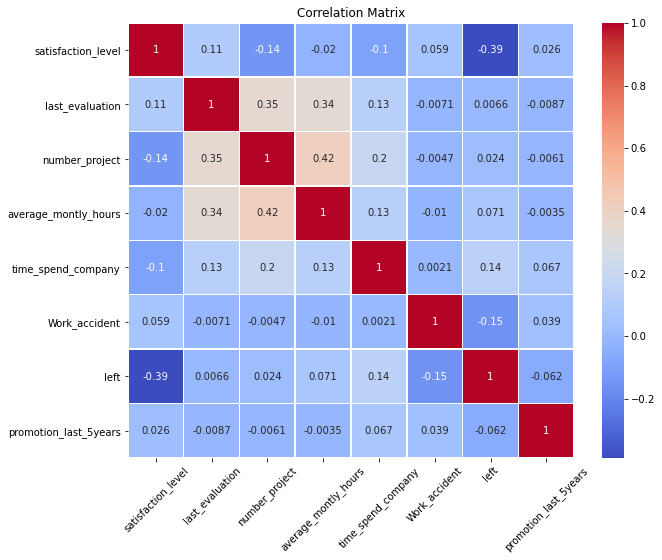

In [57]:
# Compute the correlation matrix
correlation_matrix = turnover.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.show()

moderately positive correlation between "average_monthly_hours" and number of projects and last evaluation with "average_monthly_hours" and number of projects. 

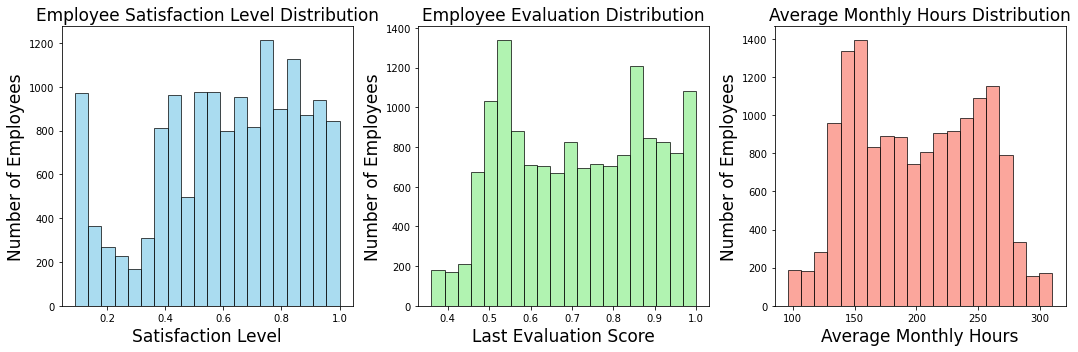

In [75]:
# Set up the figure
plt.figure(figsize=(15, 5))

# Plot for Employee Satisfaction
plt.subplot(1, 3, 1)
plt.hist(turnover['satisfaction_level'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Employee Satisfaction Level Distribution',fontsize=17)
plt.xlabel('Satisfaction Level',fontsize=17)
plt.ylabel('Number of Employees',fontsize=17)

# Plot for Employee Evaluation
plt.subplot(1, 3, 2)
plt.hist(turnover['last_evaluation'], bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('Employee Evaluation Distribution',fontsize=17)
plt.xlabel('Last Evaluation Score',fontsize=17)
plt.ylabel('Number of Employees',fontsize=17)

# Plot for Average Monthly Hours
plt.subplot(1, 3, 3)
plt.hist(turnover['average_montly_hours'], bins=20, color='salmon', edgecolor='black', alpha=0.7)
plt.title('Average Monthly Hours Distribution',fontsize=17)
plt.xlabel('Average Monthly Hours',fontsize=17)
plt.ylabel('Number of Employees',fontsize=17)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

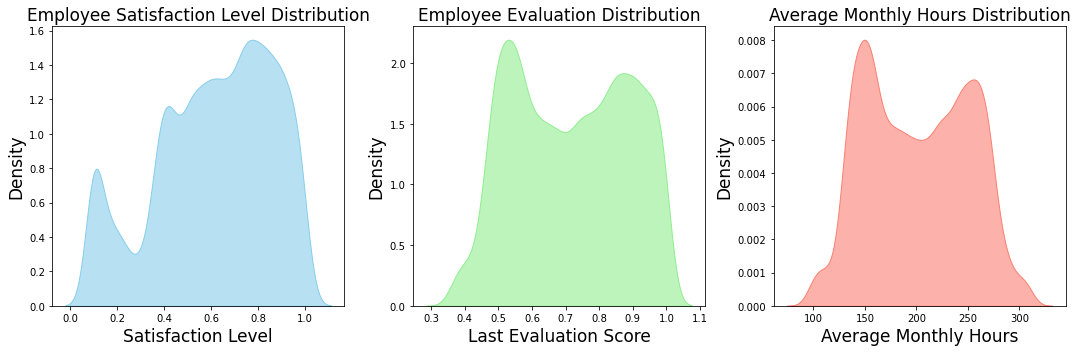

In [76]:
# Set up the figure
plt.figure(figsize=(15, 5))

# Plot for Employee Satisfaction
plt.subplot(1, 3, 1)
sns.kdeplot(turnover['satisfaction_level'], fill=True, color='skyblue', alpha=0.6)
plt.title('Employee Satisfaction Level Distribution',fontsize=17)
plt.xlabel('Satisfaction Level',fontsize=17)
plt.ylabel('Density',fontsize=17)

# Plot for Employee Evaluation
plt.subplot(1, 3, 2)
sns.kdeplot(turnover['last_evaluation'], fill=True, color='lightgreen', alpha=0.6)
plt.title('Employee Evaluation Distribution',fontsize=17)
plt.xlabel('Last Evaluation Score',fontsize=17)
plt.ylabel('Density',fontsize=17)

# Plot for Average Monthly Hours
plt.subplot(1, 3, 3)
sns.kdeplot(turnover['average_montly_hours'], fill=True, color='salmon', alpha=0.6)
plt.title('Average Monthly Hours Distribution',fontsize=17)
plt.xlabel('Average Monthly Hours',fontsize=17)
plt.ylabel('Density',fontsize=17)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [12]:
# Group the data by "left" and count the occurrences of each project count
# project_count_by_left = turnover.groupby("left")["number_project"].value_counts().sort_index()

# Create the bar plot
project_count_by_left.unstack().plot(kind="bar")

# Set the labels and title
plt.xlabel("Project Count")
plt.ylabel("Number of Employees")
plt.title("Employee Project Count by Turnover")

# Set the legend
plt.legend(["Stayed", "Left"])
# Show the plot
plt.show()

NameError: name 'project_count_by_left' is not defined

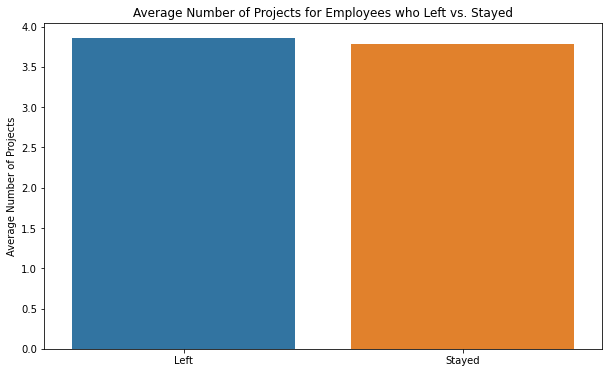

In [13]:
# Separate employees who left and those who stayed
left = turnover[turnover['left'] == 1]
stayed = turnover[turnover['left'] == 0]

# Create a bar plot for project count of employees who left and stayed
plt.figure(figsize=(10, 6))

sns.barplot(x=['Left', 'Stayed'], 
            y=[left['number_project'].mean(), stayed['number_project'].mean()])

plt.title('Average Number of Projects for Employees who Left vs. Stayed')
plt.ylabel('Average Number of Projects')
plt.show()


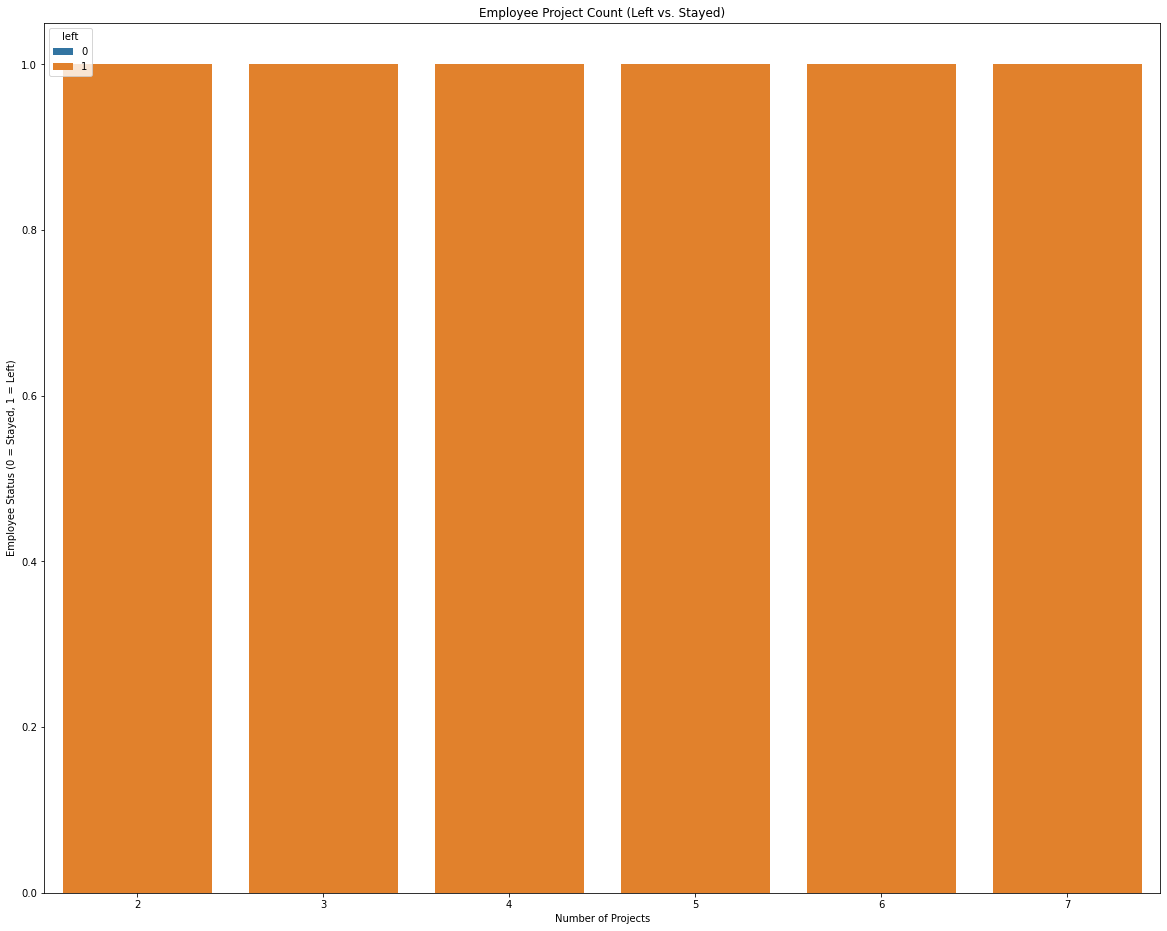

In [14]:
# Create a bar plot for the number of projects based on whether employees left or stayed
plt.figure(figsize=(20, 16))

sns.barplot(x='number_project', y='left', data=turnover, hue='left', dodge=False)

plt.title('Employee Project Count (Left vs. Stayed)')
plt.xlabel('Number of Projects')
plt.ylabel('Employee Status (0 = Stayed, 1 = Left)')
plt.show()


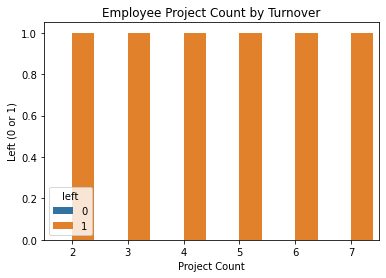

In [15]:
# Create the bar plot using Seaborn
sns.barplot(x="number_project", y="left", hue="left", data=turnover)

# Set the labels and title
plt.xlabel("Project Count")
plt.ylabel("Left (0 or 1)")
plt.title("Employee Project Count by Turnover")

# Show the plot
plt.show()

Perform clustering of employees who left based on their satisfaction and
evaluation.

3.1.
Choose columns satisfaction_level, last_evaluation, and left.

3.2.
Do K-means clustering of employees who left the company into 3
clusters?

3.3.
Based on the satisfaction and evaluation factors, give your thoughts
on the employee clusters.

In [16]:
# Filter for employees who left
left_employees = turnover[turnover["left"] == 1]

# Select the relevant columns
X = left_employees[["satisfaction_level", "last_evaluation"]]

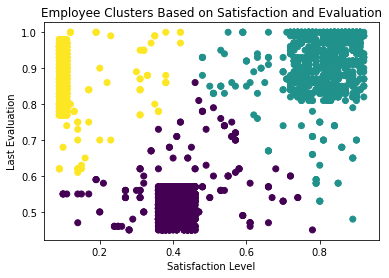

In [17]:
# Perform K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# Add the cluster labels to the DataFrame
left_employees["cluster"] = clusters

# Visualize the clusters
plt.scatter(left_employees["satisfaction_level"], left_employees["last_evaluation"], c=left_employees["cluster"], cmap="viridis")
plt.xlabel("Satisfaction Level")
plt.ylabel("Last Evaluation")
plt.title("Employee Clusters Based on Satisfaction and Evaluation")
plt.show()

Analyzing Clusters:

Once the clustering is complete, you can analyze the characteristics of each cluster:

Cluster 1: Employees with low satisfaction and poor evaluations. These employees might be dissatisfied with their work, performance, or opportunities.

Cluster 2: Employees with high satisfaction but low evaluations. This could indicate a mismatch between expectations and performance, or employees might be overperforming relative to their evaluations.

Cluster 3: Employees with low satisfaction but high evaluations. This might suggest a lack of recognition or reward for their performance, leading to dissatisfaction. Employees with mixed satisfaction and evaluation levels, suggesting potential misalignment in expectations or job fit.

By understanding these clusters, organizations can identify specific areas for improvement to enhance employee satisfaction and retention.

In [18]:
turnover.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [19]:
# Separate categorical and numeric variables
categorical_cols = ['Department', 'salary']

numeric_cols = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']

# Apply get_dummies() to categorical variables
X_categorical = turnover[categorical_cols]
X_categorical = pd.get_dummies(X_categorical)

# Combine categorical and numeric variables
X = pd.concat([X_categorical, turnover[numeric_cols]], axis=1)
y = turnover['left']

In [20]:
#Stratified split of the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)

In [21]:
#Upsample the train dataset using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=123)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

Perform 5-fold cross-validation model training and evaluate performance.

5.1.
Train a logistic regression model, apply a 5-fold CV, and plot the
classification report.

5.2.
Train a Random Forest Classifier model, apply the 5-fold CV, and plot
the classification report.

5.3.
Train a Gradient Boosting Classifier model, apply the 5-fold CV, and
plot the classification report.

In [31]:
# Preprocess the data (as previously discussed)
categorical_cols = ['Department', 'salary']
numeric_cols = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']
X_categorical = pd.get_dummies(turnover[categorical_cols])
X = pd.concat([X_categorical, turnover[numeric_cols]], axis=1)
y = turnover['left']

In [32]:
# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Perform 5-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
y_pred = cross_val_predict(log_reg, X, y, cv=skf)

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report

# Logistic Regression
logreg = LogisticRegression()
scores = cross_val_score(logreg, X_train_resampled, y_train_resampled, cv=5)
print("Logistic Regression Accuracy:", scores.mean())

# Random Forest
rf = RandomForestClassifier()
scores = cross_val_score(rf, X_train_resampled, y_train_resampled, cv=5)
print("Random Forest Accuracy:", scores.mean())

# Gradient Boosting
gb = GradientBoostingClassifier()
scores = cross_val_score(gb, X_train_resampled, y_train_resampled, cv=5)
print("Gradient Boosting Accuracy:", scores.mean())

# Evaluate on the test set
models = [logreg, rf, gb]
for model in models:
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)
    print(f"\n{model.__class__.__name__} Classification Report:\n{report}")

Logistic Regression Accuracy: 0.7955055470489436
Random Forest Accuracy: 0.9830453301692327
Gradient Boosting Accuracy: 0.9608946961224808

LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.78      0.84      2286
           1       0.51      0.75      0.61       714

    accuracy                           0.77      3000
   macro avg       0.71      0.76      0.72      3000
weighted avg       0.81      0.77      0.78      3000


RandomForestClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.97      0.98      0.97       714

    accuracy                           0.99      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000


GradientBoostingClassifier Classification Report:
              precision    recall  f1-score   support

           

In [41]:
def plot_classification_report(model, X_test, y_test):
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Extract classes and their F1 scores
    classes = list(report.keys())
    f1_scores = [report[k]['f1-score'] for k in classes if k != 'accuracy' and k != 'macro avg' and k != 'weighted avg']
    
    # Create the bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=classes, y=f1_scores, palette='viridis')
    plt.title(f"{model.__class__.__name__} Classification Report")
    plt.xlabel('Classes')
    plt.ylabel('F1 Score')
    plt.xticks(rotation=45)
    plt.show()

# Evaluate on the test set and plot classification reports
models = [logreg, rf, gb]
for model in models:
    model.fit(X_train_resampled, y_train_resampled)
    plot_classification_report(model, X_test, y_test)

KeyError: '0'

<Figure size 720x432 with 0 Axes>

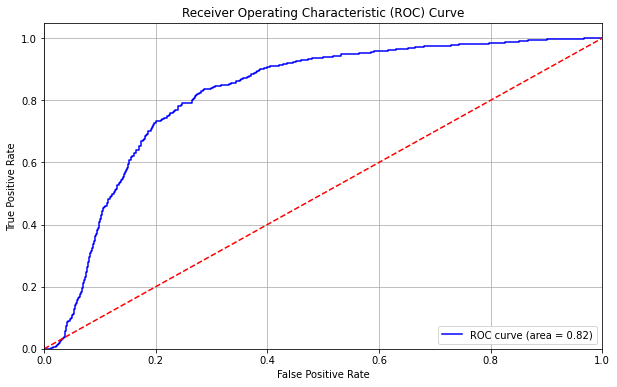

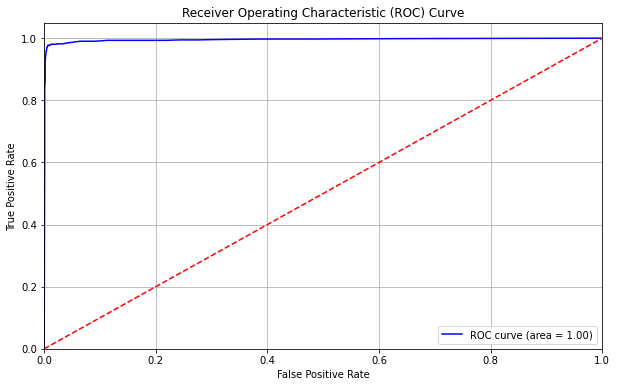

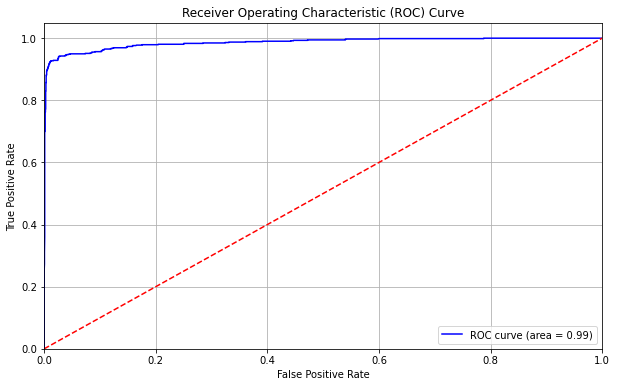

In [42]:
from sklearn.metrics import roc_curve, auc

# Function to plot ROC curve and calculate AUC
def plot_roc_curve(model, X_test, y_test):
    # Get predicted probabilities for the positive class
    y_probs = model.predict_proba(X_test)[:, 1]
    
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    
    # Calculate AUC
    roc_auc = auc(fpr, tpr)
    
    # Plotting the ROC curve
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for random chance
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

# Evaluate on the test set and plot ROC curves
models = [logreg, rf, gb]
for model in models:
    model.fit(X_train_resampled, y_train_resampled)  # Fit the model on the resampled training data
    plot_roc_curve(model, X_test, y_test)  # Plot ROC curve for each model

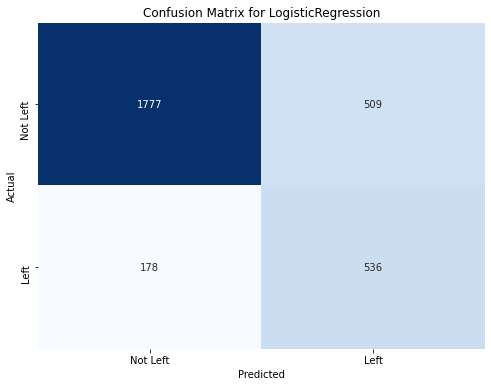

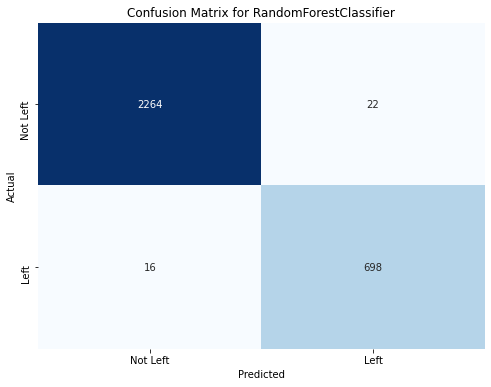

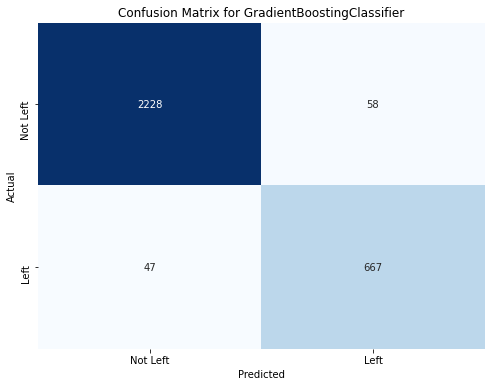

In [43]:
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not Left', 'Left'], yticklabels=['Not Left', 'Left'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model.__class__.__name__}')
    plt.show()

# Evaluate on the test set and plot confusion matrices
models = [logreg, rf, gb]
for model in models:
    model.fit(X_train_resampled, y_train_resampled)  # Fit the model on the resampled training data
    plot_confusion_matrix(model, X_test, y_test)  # Plot confusion matrix for each model

In [44]:
# Assuming rf is your best model
best_model = rf  # Replace with your best model if different

# Fit the model on the resampled training data
best_model.fit(X_train_resampled, y_train_resampled)

# Predict probabilities for the test set
probabilities = best_model.predict_proba(X_test)[:, 1]  # Get probabilities for class '1' (employee left)

# Create a DataFrame to display results
results_df = pd.DataFrame(X_test.copy())  # Copy test features
results_df['Predicted Probability of Turnover'] = probabilities

# Display the first few rows of results
print(results_df[['Predicted Probability of Turnover']].head())

       Predicted Probability of Turnover
10627                               0.00
2703                                0.74
6059                                0.12
3258                                0.00
4565                                0.01


Based on the probability score ranges provided, we can categorize employees into four zones and suggest retention strategies for each zone. Here’s how the categorization looks:

### Employee Turnover Zones

1. **Safe Zone (Green)**: Probability Score < 20%
2. **Low-Risk Zone (Yellow)**: 20% ≤ Probability Score < 60%
3. **Medium-Risk Zone (Orange)**: 60% ≤ Probability Score < 90%
4. **High-Risk Zone (Red)**: Probability Score ≥ 90%

### Suggested Retention Strategies

#### Safe Zone (Green)
- **Characteristics**: Employees in this zone are highly unlikely to leave the organization.
- **Retention Strategies**:
  - **Recognition and Rewards**: Continue to recognize and reward these employees for their contributions to maintain morale and motivation.
  - **Career Development**: Offer opportunities for professional growth, such as training programs and leadership development initiatives, to keep them engaged.
  - **Feedback Mechanisms**: Regularly solicit feedback to ensure that their needs and concerns are addressed promptly.

#### Low-Risk Zone (Yellow)
- **Characteristics**: Employees in this zone have a moderate risk of leaving but are generally satisfied.
- **Retention Strategies**:
  - **Engagement Programs**: Implement employee engagement initiatives, such as team-building activities and social events, to strengthen relationships within the team.
  - **Career Pathing**: Discuss career aspirations with these employees and create clear pathways for advancement within the organization.
  - **Work-Life Balance**: Promote a healthy work-life balance through flexible working arrangements or wellness programs.

#### Medium-Risk Zone (Orange)
- **Characteristics**: Employees in this zone show signs of potential turnover and may be dissatisfied or disengaged.
- **Retention Strategies**:
  - **Exit Interviews**: Conduct exit interviews with departing employees to understand common reasons for turnover and address these issues proactively.
  - **Mentorship Programs**: Pair these employees with mentors who can provide guidance, support, and encouragement to improve their job satisfaction.
  - **Regular Check-ins**: Schedule regular one-on-one meetings to discuss any concerns they may have and provide support where needed.

#### High-Risk Zone (Red)
- **Characteristics**: Employees in this zone are at a high risk of leaving the organization.
- **Retention Strategies**:
  - **Immediate Intervention**: Identify the root causes of dissatisfaction through surveys or direct conversations and take immediate action to address them.
  - **Incentives for Retention**: Consider offering financial incentives, such as bonuses or salary increases, to encourage them to stay.
  - **Personalized Development Plans**: Work closely with these employees to create personalized development plans that align with their career goals and aspirations.

### Conclusion
By categorizing employees based on their predicted probability of turnover, organizations can tailor their retention strategies effectively. Addressing the specific needs of each zone not only helps retain talent but also fosters a positive work environment that encourages employee loyalty and satisfaction.

Citations:
[1] https://ppl-ai-file-upload.s3.amazonaws.com/web/direct-files/32137281/35c33e92-c504-4f06-9ef1-7f4d535b89ef/HR_comma_sep.csv

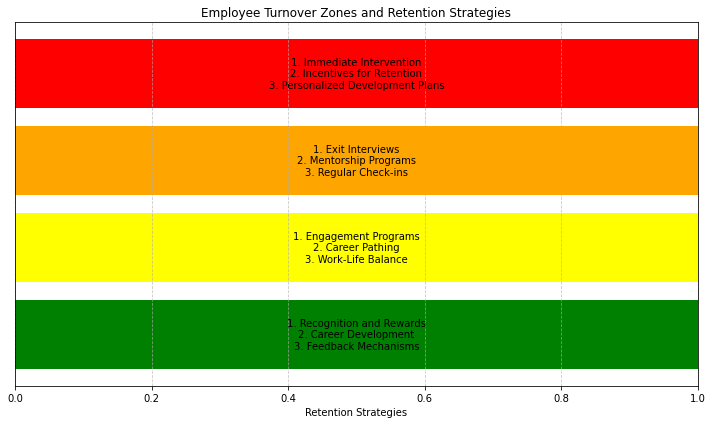

In [45]:
import matplotlib.pyplot as plt

# Define the zones and their corresponding strategies
zones = ['Safe Zone (Green)', 'Low-Risk Zone (Yellow)', 'Medium-Risk Zone (Orange)', 'High-Risk Zone (Red)']
strategies = [
    "1. Recognition and Rewards\n2. Career Development\n3. Feedback Mechanisms",
    "1. Engagement Programs\n2. Career Pathing\n3. Work-Life Balance",
    "1. Exit Interviews\n2. Mentorship Programs\n3. Regular Check-ins",
    "1. Immediate Intervention\n2. Incentives for Retention\n3. Personalized Development Plans"
]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create a bar chart
ax.barh(zones, [1]*len(zones), color=['green', 'yellow', 'orange', 'red'])

# Add strategy text to the bars
for i in range(len(zones)):
    ax.text(0.5, i, strategies[i], ha='center', va='center', fontsize=10, color='black')

# Set labels and title
ax.set_xlim(0, 1)
ax.set_xlabel('Retention Strategies')
ax.set_title('Employee Turnover Zones and Retention Strategies')

# Hide y-axis ticks
ax.yaxis.set_ticks([])

# Show grid lines for better readability
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

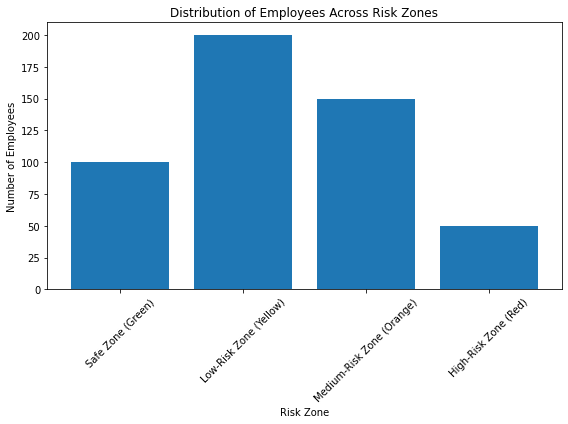

In [47]:
import matplotlib.pyplot as plt

# Assuming you have already categorized employees into risk zones
# and have the counts for each zone

# Define the risk zones and their corresponding counts
risk_zones = ['Safe Zone (Green)', 'Low-Risk Zone (Yellow)', 'Medium-Risk Zone (Orange)', 'High-Risk Zone (Red)']
zone_counts = [100, 200, 150, 50]

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(risk_zones, zone_counts)
plt.xlabel('Risk Zone')
plt.ylabel('Number of Employees')
plt.title('Distribution of Employees Across Risk Zones')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

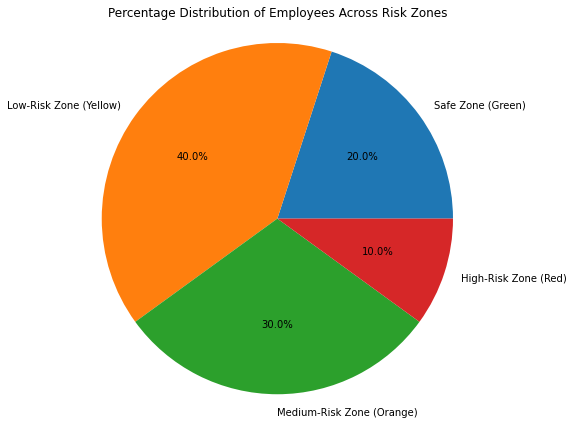

In [48]:
# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(zone_counts, labels=risk_zones, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Percentage Distribution of Employees Across Risk Zones')
plt.tight_layout()
plt.show()